In [55]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [57]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [58]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [59]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Load the data (assuming it's already loaded in df_market_data)
# df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")  # Example

# Optionally, define numeric columns for scaling (leave as None if you want to scale all numeric columns)
num_cols = ['price_change_percentage_24h', 'price_change_percentage_7d', 
            'price_change_percentage_14d', 'price_change_percentage_30d', 
            'price_change_percentage_60d', 'price_change_percentage_200d', 
            'price_change_percentage_1y']

# If num_cols is provided, use it, otherwise select all numeric columns
if num_cols:
    # Use the predefined list of columns
    columns_to_scale = num_cols
else:
    # Select all numeric columns from the DataFrame dynamically
    columns_to_scale = df_market_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
df_scaled = pd.DataFrame(scaler.fit_transform(df_market_data[columns_to_scale]),
                         columns=columns_to_scale, 
                         index=df_market_data.index)  

# Optionally, if 'coin_id' was not the index in the original DataFrame, you can restore it
# df_scaled['coin_id'] = df_market_data['coin_id']  # If you need to add 'coin_id' as a column
# df_scaled.set_index('coin_id', inplace=True)  # If you want to set it back as the index

# Display the scaled DataFrame
df_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [60]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [61]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
scaler = StandardScaler()
df_market_data_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), columns=df_market_data.columns, index=df_market_data.index)
# Loop through k values from 1 to 11
for k in range(1, 12):  # k goes from 1 to 11
    # Create a KMeans model with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data (df_market_data_scaled should already be normalized)
    kmeans.fit(df_market_data_scaled)
    
    # Append the inertia value to the inertia_values list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)

[287.0, 212.1233420748626, 170.19357087970297, 79.02243535120977, 71.0979135124442, 66.1088267804475, 54.48812315624117, 43.224692666580424, 32.86088447122681, 28.404884636873096, 24.116198421409198]


In [62]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # k values from 1 to 11
    'inertia': inertia_values  # Inertia values from previous loop
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


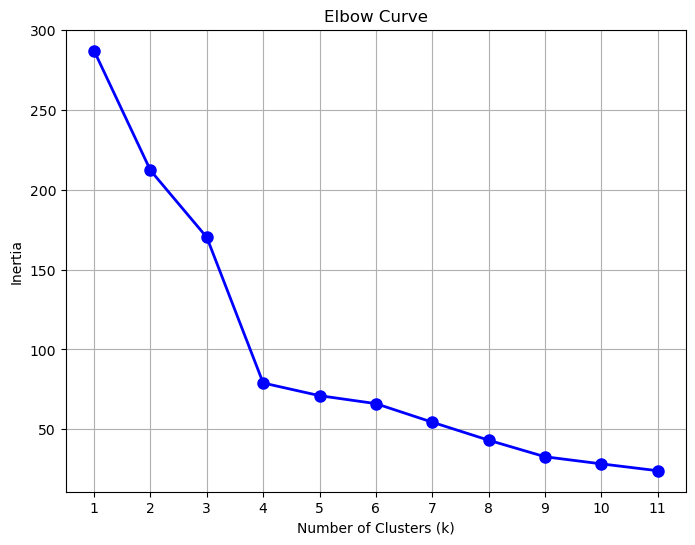

In [63]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), inertia_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))  # Show x-axis with integer values from 1 to 11
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k in KMeans clustring is typically chosen by analyzing the Elbow curve. The Elbow Method helps identify the point where increasing the number of clusters does not significantly decrease inertia (within-clusteer sum of the squares)

Looking at the inertia values above:
- As k increases from 1 to 4, the inertia decreases significantly.
- After k=4, the reduction in inertia starts to slow down and becomes less steep.
- Between k=4 and k=11, inertia still decreases, but at a much slower rate.

Conclusion: 

- The best value for k is typically chosen where elbow occurs - this is where the inertia starts decreasing at a much lower rate.

- From the values, we can see that k=4 seems to be the optimal choice, as the inertia sharply decreases until this point, and after that, that decrease slows down significantly

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [64]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [65]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=42)

In [66]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(predicted_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [67]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_market_data_scaled.copy()


In [68]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['predicted_cluster'] = predicted_clusters

# Display the copy of the scaled DataFrame
df_scaled_copy.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [69]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_scaled_copy['coin_id'] = df_scaled_copy.index

scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    by="predicted_cluster",  # Color points by predicted cluster
    hover_cols=["coin_id"],   # Show cryptocurrency name on hover
    title="Cryptocurrency Price Changes (24h vs 7d)",
    width=800,               # Set plot width
    height=400               # Set plot height
)

# Display the plot
scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [70]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [71]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_components = pca.fit_transform(df_scaled_copy.drop(columns=['predicted_cluster', 'coin_id']))

df_pca_scaled = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_scaled_copy.index)

# View the scaled PCA data
df_pca_scaled.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [72]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Display the explained variance ratio for each component
print("Explained variance for each principal component:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f}")
    
# Display the total explained variance
total_explained_variance = explained_variance.sum()
print(f"\nTotal explained variance: {total_explained_variance:.4f}")

Explained variance for each principal component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760

Total explained variance: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the theree principal components, as shown in your results, is 0.8950 

This means that the three principal components together explain 89.50% of the total variance in your datset, indicating that most of the original information has been retained in the reduced dimensionality.

In [73]:
# Create a new DataFrame with the PCA data.
df_pca_scaled = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
df_pca_scaled['coin_id'] = df_scaled_copy.index

# Set the coin_id column as index
df_pca_scaled.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print(df_pca_scaled.head(10))

                      PC1       PC2       PC3
coin_id                                      
bitcoin         -0.600667  0.842760  0.461595
ethereum        -0.458261  0.458466  0.952877
tether          -0.433070 -0.168126 -0.641752
ripple          -0.471835 -0.222660 -0.479053
bitcoin-cash    -1.157800  2.041209  1.859715
binancecoin     -0.516534  1.388377  0.804071
chainlink       -0.450711  0.517699  2.846143
cardano         -0.345600  0.729439  1.478013
litecoin        -0.649468  0.432165  0.600303
bitcoin-cash-sv -0.759014 -0.201200 -0.217653


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [74]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [75]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):  # k goes from 1 to 11
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca_scaled)  # Assuming df_pca_scaled is the PCA-transformed data
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)

[256.8740855678923, 182.3395300777564, 140.43183298408354, 49.665496651797326, 42.05190109791722, 31.74900524438899, 28.031869172552724, 19.45174720604134, 13.814081971558085, 10.63064757387095, 10.120242629957746]


In [76]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # k values from 1 to 11
    'inertia': inertia_values  # Inertia values from the previous loop
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

elbow_df.head()

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


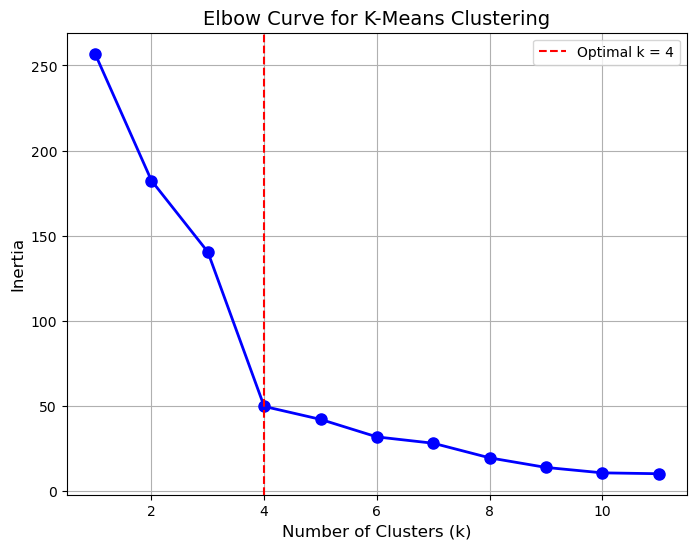

In [77]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Adding titles and labels
plt.title('Elbow Curve for K-Means Clustering', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

# Highlight the elbow (optional)
plt.axvline(x=4, color='r', linestyle='--', label='Optimal k = 4')  # This is an example, adjust based on your plot

# Display grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Looking at the inertia values:
  - The inertia drops significantly from 256.87 (for k=1) to 182.34 (for k=2) and continues to drop until it reaches a much smaller value at k=4.

  - Beyond k=4, the rate of decrease starts to slow, suggesting that adding more clusters does not significantly improve the model's performance.

  Thus, k=4 is the optimal choice based on this analysis.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The best k value remains the same (4) when using both the original data and the PCA-transformed data. This suggests that the data structure in terms of clusters does not drastically change when you reduce the dimensionality of the data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [78]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [80]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca_scaled)

KMeans(n_clusters=4, random_state=42)

In [81]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predicted_clusters = kmeans_model.predict(df_pca_scaled)

# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [82]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca_copy = df_pca_scaled.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_data_pca_copy['Cluster'] = predicted_clusters

# Display the copy of the scaled PCA DataFrame
print(df_market_data_pca_copy)

                           PC1       PC2       PC3  Cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        0
ethereum             -0.458261  0.458466  0.952877        0
tether               -0.433070 -0.168126 -0.641752        2
ripple               -0.471835 -0.222660 -0.479053        2
bitcoin-cash         -1.157800  2.041209  1.859715        0
binancecoin          -0.516534  1.388377  0.804071        0
chainlink            -0.450711  0.517699  2.846143        0
cardano              -0.345600  0.729439  1.478013        0
litecoin             -0.649468  0.432165  0.600303        0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        2
crypto-com-chain     -0.248198 -1.376252 -1.462026        2
usd-coin             -0.438408 -0.175337 -0.663388        2
eos                  -0.693425 -0.473815 -0.527597        2
monero                0.060499  2.909404  1.498571        0
tron                 -0.393352 -0.108192

In [83]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
df_market_data_pca_copy['crypto_name'] = df_market_data_pca_copy.index
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='Cluster',         
    hover_cols=['crypto_name'], 
    cmap='viridis',       
    size=100,             
    title="Cryptocurrency Clusters in PCA Space (PC1 vs PC2)",  
    height=500,           
    width=800             
)

# Display the scatter plot
scatter_plot

:Scatter   [PC1]   (PC2,Cluster,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

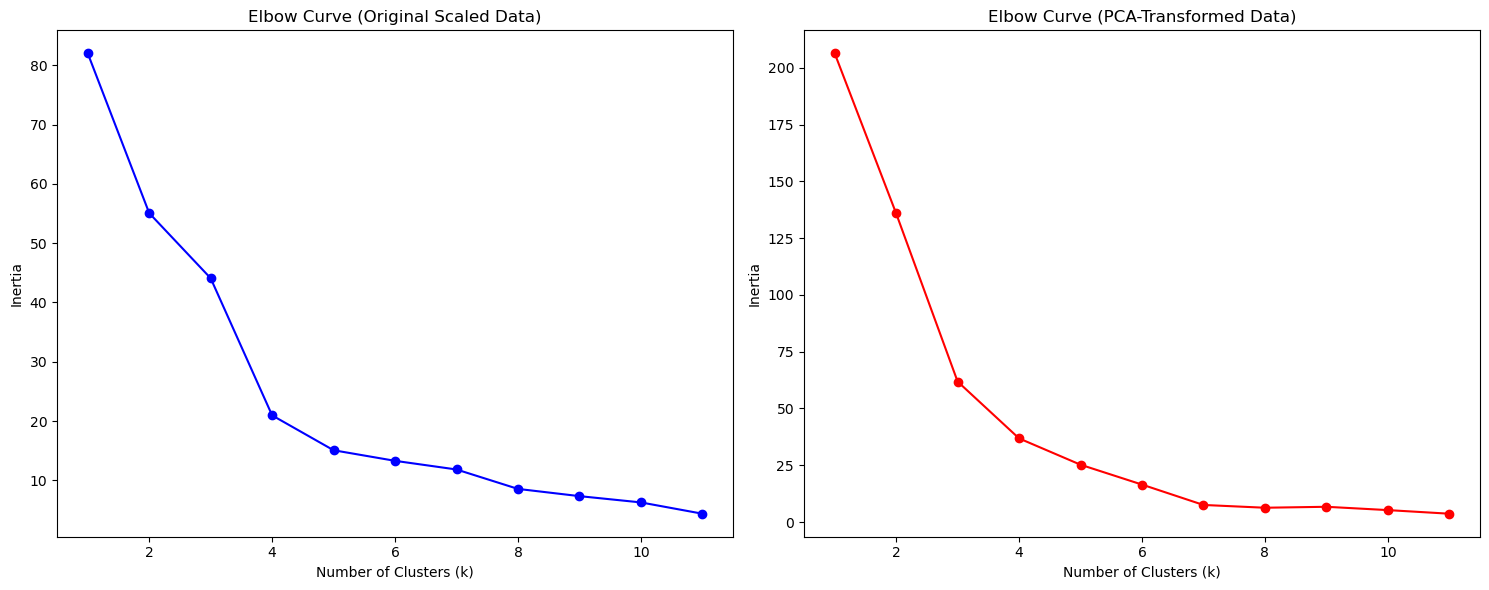

In [84]:
# Composite plot to contrast the Elbow curves
# Step 1: Calculate inertia for the original scaled data
inertia_original = []
for k in range(1, 12):
    kmeans_original = KMeans(n_clusters=k, random_state=42)
    kmeans_original.fit(df_scaled[['price_change_percentage_24h', 'price_change_percentage_7d']])
    inertia_original.append(kmeans_original.inertia_)

# Step 2: Calculate inertia for the PCA-transformed data
inertia_pca = []
for k in range(1, 12):
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(df_market_data_pca_copy[['PC1', 'PC2']])
    inertia_pca.append(kmeans_pca.inertia_)

# Step 3: Create a composite plot to show both Elbow Curves
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the Elbow curve for original scaled data
axes[0].plot(range(1, 12), inertia_original, marker='o', color='b')
axes[0].set_title("Elbow Curve (Original Scaled Data)")
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')

# Plot the Elbow curve for PCA-transformed data
axes[1].plot(range(1, 12), inertia_pca, marker='o', color='r')
axes[1].set_title("Elbow Curve (PCA-Transformed Data)")
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Inertia')

# Display the composite plot
plt.tight_layout()
plt.show()

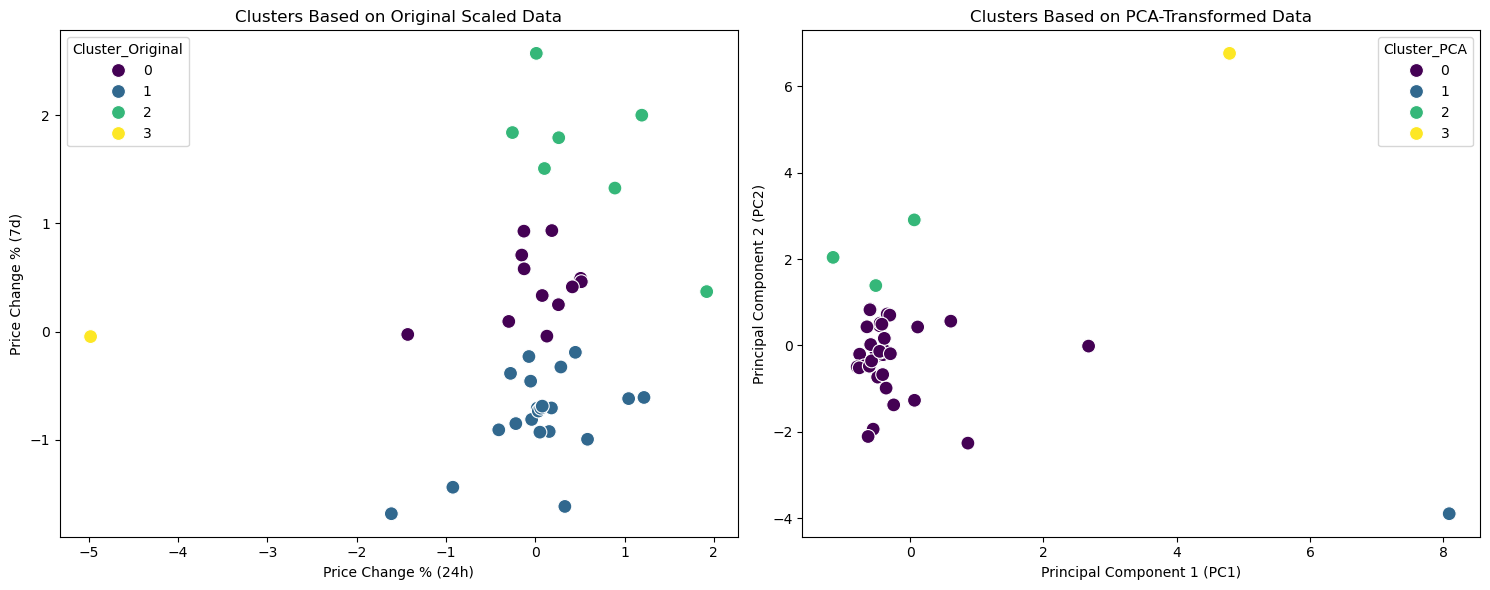

In [85]:
# Composite plot to contrast the clusters
# Step 1: Perform KMeans clustering on the original scaled data (using 4 clusters from previous analysis)
kmeans_original = KMeans(n_clusters=4, random_state=42)
kmeans_original.fit(df_scaled[['price_change_percentage_24h', 'price_change_percentage_7d']])
predicted_clusters_original = kmeans_original.predict(df_scaled[['price_change_percentage_24h', 'price_change_percentage_7d']])

# Step 2: Perform KMeans clustering on the PCA-transformed data (using 4 clusters from previous analysis)
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(df_market_data_pca_copy[['PC1', 'PC2']])
predicted_clusters_pca = kmeans_pca.predict(df_market_data_pca_copy[['PC1', 'PC2']])

# Add cluster labels to the DataFrames
df_scaled['Cluster_Original'] = predicted_clusters_original
df_market_data_pca_copy['Cluster_PCA'] = predicted_clusters_pca

# Step 3: Create a composite plot to contrast the clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the clusters based on the original scaled data
sns.scatterplot(data=df_scaled, x='price_change_percentage_24h', y='price_change_percentage_7d', 
                hue='Cluster_Original', palette='viridis', ax=axes[0], s=100, marker='o')
axes[0].set_title("Clusters Based on Original Scaled Data")
axes[0].set_xlabel('Price Change % (24h)')
axes[0].set_ylabel('Price Change % (7d)')

# Plot the clusters based on the PCA-transformed data
sns.scatterplot(data=df_market_data_pca_copy, x='PC1', y='PC2', 
                hue='Cluster_PCA', palette='viridis', ax=axes[1], s=100, marker='o')
axes[1].set_title("Clusters Based on PCA-Transformed Data")
axes[1].set_xlabel('Principal Component 1 (PC1)')
axes[1].set_ylabel('Principal Component 2 (PC2)')

# Display the composite plot
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The impact of using fewer features (such as PCA-transformed data) in K-Means clustering is simplification and speed at the cost of some loss in the detail and granularity of the clusters. While PCA may result in more distict and well-separated clusters in many cases, it can also discard important information from the original features that might be useful for clustering. Conversely, using more features might lead to more detailed and complex clusters but could also suffer from overfitting or poor generalization.